<a href="https://colab.research.google.com/github/vCillusion/Social-Defender/blob/master/Code/Social_Defender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Defender
Social Defender is an idea to use the machine algorithm to perform sentiment analysis and create a positive outlook for the users, by using customized views and tagging content. 

## Hinglish Sentiment Analysis
The first target of the application is to learn and perform sentiment analysis model to categorize Hinglish data. 

### Analyzing the Dataset
The dataset is loaded using the Pandas library.

Basic Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
Comments Text     126 non-null object
Feelings Text     126 non-null object
Emotions Text     126 non-null object
Context Text      126 non-null object
Feelings Value    126 non-null int64
Emotions Value    126 non-null int64
Context Value     126 non-null int64
dtypes: int64(3), object(4)
memory usage: 7.0+ KB
None
(126, 7)
Head and Tail of data
                                    Comments Text Feelings Text Emotions Text  \
0                                           🦋🦋🦋❤️      Positive        Loving   
1  Pdhane do didi ! 😫 Semester exam chl rhe hai !      Negative       Sarcasm   
2                               @dishapatani 🔥🔥🔥👈      Positive    Compliment   
3           @dishapatani u are always fabulous ❤️      Positive    Compliment   
4           @dishapatani mbd radisson blu delhi..       Neutral   Information   

  Context Text  Feelings Value  Emotions V

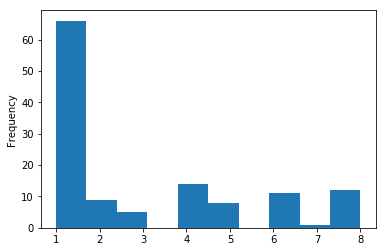

In [0]:
import pandas as pd
import io
df = pd.read_csv('https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Emotions/Emotions_Data.csv')
print('Basic Information')
print(df.info())
print(df.shape)
print('Head and Tail of data')
print(df.head())
print(df.tail())
# Plot to get a gist of frequency and type of values
df['Emotions Value'].plot(kind='hist')

### Processing the data
We might want to clean the data to get better results. We could remove the stop words, most common words to understand the context better.

#### English Stop words using nltk

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_english = stopwords.words("english")
print(stop_english)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

#### Hindi Stop words using [Hinglish NLP](https://github.com/TrigonaMinima/HinglishNLP)

In [2]:
import os
def loadFileFromUrl ( url, filename, override = True ) :
  exists = os.path.isfile(filename)
  if not exists or override:
    # raw=true is important so you download the file rather than the webpage.
    !wget $url
    # rename the file
    !mv $filename\?raw\=true $filename
  return filename

def getFile ( filename ) :
  file = open(filename, 'r')
  return file

def readFile ( filename ) :
  return getFile(filename).read()

def getFileFromUrl ( url, filename, override = True ) :
  return getFile(loadFileFromUrl(url, filename, override ))

def readFileFromUrl ( url, filename, override = True ) :
  return readFile(loadFileFromUrl(url, filename, override))

def readFileFromUrlSplit ( url, filename, override = True ) :
  return readFileFromUrl(url, filename, override).splitlines()

# Load Hindi Stopwords
fileUrl = 'https://github.com/vCillusion/Social-Defender/blob/master/Data/Stop%20Words/stop_hindi.txt?raw=true'
fileName = 'stop_hindi.txt'
stop_hindi = readFileFromUrlSplit (fileUrl, fileName)
# print(stop_hindi)

# Load Hinglish Stopwords
fileUrl = 'https://github.com/vCillusion/Social-Defender/blob/master/Data/Stop%20Words/stop_hinglish.txt?raw=true'
fileName = 'stop_hinglish.txt'
stop_hinglish = readFileFromUrlSplit (fileUrl, fileName)
# print(stop_hinglish)

# Load Shorthands Stopwords
fileUrl = 'https://github.com/vCillusion/Social-Defender/blob/master/Data/Stop%20Words/stop_shorthands.txt?raw=true'
fileName = 'stop_shorthands.txt'
stop_shorthands = readFileFromUrlSplit (fileUrl, fileName)
# print(stop_shorthands)

--2019-05-04 09:15:29--  https://github.com/vCillusion/Social-Defender/blob/master/Data/Stop%20Words/stop_hindi.txt?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/vCillusion/Social-Defender/raw/master/Data/Stop%20Words/stop_hindi.txt [following]
--2019-05-04 09:15:29--  https://github.com/vCillusion/Social-Defender/raw/master/Data/Stop%20Words/stop_hindi.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Stop%20Words/stop_hindi.txt [following]
--2019-05-04 09:15:30--  https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Stop%20Words/stop_hindi.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connectin

#### Using the stop words

In [0]:
short_data = df.head()
stop = []
stop.extend(stop_hindi)
stop.extend(stop_english)
stop.extend(stop_hinglish)
stop.extend(stop_shorthands)
print('Remove Stop words')
short_data['Comments Text_Stop'] = short_data['Comments Text'].apply(
    lambda comment: ' '.join([word for word in comment.split() 
                              if word not in 
                              (stop)]))
print(short_data['Comments Text'])
print(short_data['Comments Text_Stop'])


Remove Stop words
0                                             🦋🦋🦋❤️
1    Pdhane do didi ! 😫 Semester exam chl rhe hai !
2                                 @dishapatani 🔥🔥🔥👈
3             @dishapatani u are always fabulous ❤️
4             @dishapatani mbd radisson blu delhi..
Name: Comments Text, dtype: object
0                                    🦋🦋🦋❤️
1      Pdhane didi ! 😫 Semester exam chl !
2                        @dishapatani 🔥🔥🔥👈
3                 @dishapatani fabulous ❤️
4    @dishapatani mbd radisson blu delhi..
Name: Comments Text_Stop, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Using the slang translator
The plan is to make the text more readable by expanding the abbreviations by using similar logic mentioned in the [blog post](https://medium.com/nerd-stuff/python-script-to-turn-text-message-abbreviations-into-actual-phrases-d5db6f489222).

In [11]:
!pip install pipenv
!pipenv install requests
from requests.structures import CaseInsensitiveDict
import re

def initMap(fileUrl, fileName, delimiter, override):
  exists = os.path.isfile(fileName)
  inputFile = getFileFromUrl (fileUrl, fileName, override)
  resultMap = CaseInsensitiveDict({})
  for line in inputFile:
    (key, val) = line.split("=")
    resultMap[key] = val
    # print(resultMap)
    return resultMap

def translator(input):
  # Load File path which consists of Abbreviations
  fileUrl = 'https://github.com/vCillusion/Social-Defender/blob/master/Data/Abbreviations/slang.txt?raw=true'
  fileName = 'slang.txt'
  delimiter = '='
  abbreviations_slang = initMap(fileUrl, fileName, delimiter, True)

  # Loop over words and replace slangs
  words = input.split(' ')
  for index, word in enumerate(words, start=1):
    # Removing Special Characters.
    wordRe = re.sub('[^a-zA-Z0-9-_.]', '', word)
    if abbreviations_slang.has_key(wordRe):
      words[index] = abbreviations_slang[wordRe]
  
  # Create output
  output = ' '.join(word)
  print(output)
  return output
  
translator('brb pal')

Installing requests…
Adding requests to Pipfile's [packages]…
✔ Installation Succeeded 
Installing dependencies from Pipfile.lock (b14837)…
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 5/5 — 00:00:02
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
--2019-05-04 09:59:00--  https://github.com/vCillusion/Social-Defender/blob/master/Data/Abbreviations/slang.txt?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/vCillusion/Social-Defender/raw/master/Data/Abbreviations/slang.txt [following]
--2019-05-04 09:59:01--  https://github.com/vCillusion/Social-Defender/raw/master/Data/Abbreviations/slang.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vCillusion/Social-Defender

AttributeError: ignored